# Test of Resampling Methods

## Utility Functions

In [1]:
import time

import pandas as pd
import numpy as np
import neurokit2 as nk

%matplotlib inline

In [2]:
def generate_signal(length=1000, end=20):
    signal = np.cos(np.linspace(start=0, stop=end, num=length))
    return(signal)

In [3]:
def resample(signal, method="interpolation"):
    t0 = time.time()
    resampled = nk.signal_resample(
        nk.signal_resample(signal,
                           sampling_rate=100,
                           desired_sampling_rate=50,
                           method=method),
        sampling_rate=50,
        desired_sampling_rate=100,
        method=method)
    t = (time.time() - t0) * 100
    return(resampled, t)
    

def resample_all(signal):
    
    interpolation, t_interpolation = resample(signal, "interpolation")
    numpy, t_numpy = resample(signal, "numpy")
    fft, t_fft = resample(signal, "FFT")
    poly, t_poly = resample(signal, "poly")
    pandas, t_pandas = resample(signal, "pandas")
    
    data = pd.DataFrame({"Original": signal,
                         "Interpolation": interpolation,
                         "Numpy": numpy,
                         "FFT": fft,
                         "Poly": poly,
                         "Pandas": pandas})
    data["Signal_Length"] = len(signal)
    
    timings = pd.DataFrame({"Interpolation": [t_interpolation],
                            "Numpy": [t_numpy],
                            "FFT": [t_fft],
                            "Poly": [t_poly],
                            "Pandas": [t_pandas]})
    timings["Signal_Length"] = len(signal)
    return(data, timings)

In [4]:
def get_difference(data):
    diff = pd.DataFrame({"Interpolation": data["Original"] - data["Interpolation"],
                         "Numpy": data["Original"] - data["Numpy"],
                         "FFT": data["Original"] - data["FFT"],
                         "Poly": data["Original"] - data["Poly"],
                         "Pandas": data["Original"] - data["Pandas"]})
    return(diff)

## Check Functions

In [5]:
data, timing = resample_all(np.cos(np.linspace(start=0, stop=20, num=50)))
data.iloc[:,:-1].plot(style='.-')

ZeroDivisionError: integer division or modulo by zero

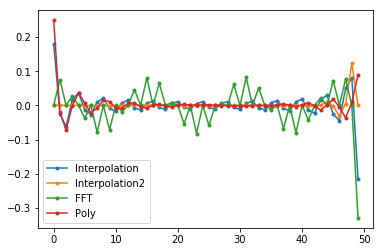

In [6]:
get_difference(data).plot(style='.-')

## Run Test

In [9]:
# This takes some time
timings = []
diffs = []
for length in range(10, 10**5, 100):
    for i in range(2):
        end = np.random.randint(1, 5000)
        data, timing = resample_all(generate_signal(length, end))
        diff = get_difference(data)
        diff = pd.DataFrame(diff.median()).transpose()
        diff["Signal_Length"] = data["Signal_Length"][0]
        diffs += [diff]
        timings += [timing]
timings = pd.concat(timings)
diffs = pd.concat(diffs)

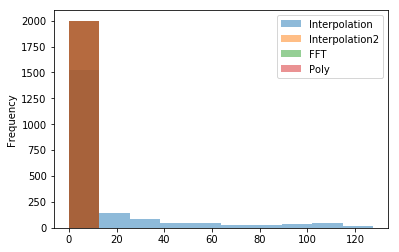

In [10]:
timings.iloc[:,:-1].plot.hist(alpha=0.5)

In [11]:
timings.iloc[:,:-1].describe()

,Interpolation,Interpolation2,FFT,Poly
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,14.049804,0.814745,0.115122,0.246141
std,26.831442,0.469377,0.072144,0.127362
min,0.000000,0.000000,0.000000,0.000000
25%,0.698113,0.399256,0.099397,0.103331
50%,2.097929,0.798321,0.099802,0.207663
75%,11.432779,1.200485,0.199366,0.315660
max,127.506709,1.805115,0.303459,0.602412


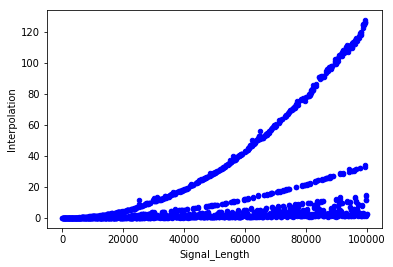

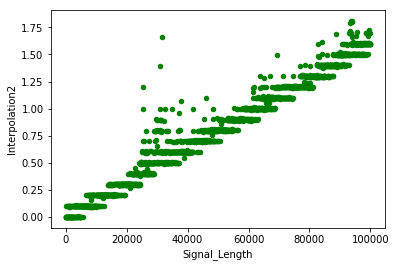

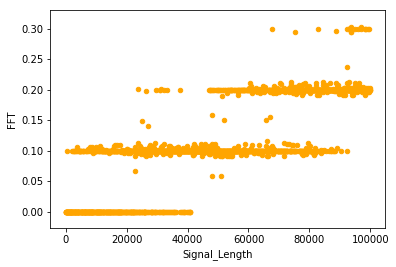

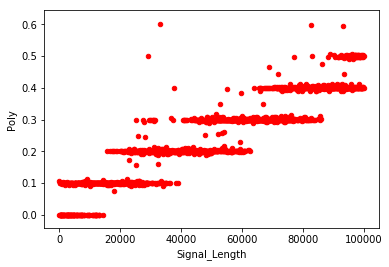

In [12]:
timings.plot.scatter(x='Signal_Length', y='Interpolation', c="blue")
timings.plot.scatter(x='Signal_Length', y='Interpolation2', c="green")
timings.plot.scatter(x='Signal_Length', y='FFT', c="orange")
timings.plot.scatter(x='Signal_Length', y='Poly', c="red")

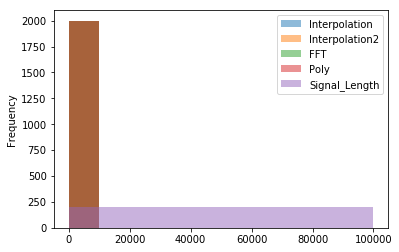

In [13]:
diffs.plot.hist(alpha=0.5)

In [14]:
diffs.describe()

,Interpolation,Interpolation2,FFT,Poly,Signal_Length
count,2.000000e+03,2.000000e+03,2000.0,2.000000e+03,2000.000000
mean,-7.482647e-05,-1.006731e-05,0.0,-4.797412e-05,49960.000000
std,5.167886e-03,2.976844e-04,0.0,5.653563e-03,28874.718608
min,-2.124881e-01,-7.052226e-03,0.0,-2.111418e-01,10.000000
25%,-6.456641e-13,-6.106227e-16,0.0,-4.795615e-08,24985.000000
50%,-1.387779e-15,7.938095e-14,0.0,2.625818e-08,49960.000000
75%,8.079856e-13,4.936301e-12,0.0,4.181130e-07,74935.000000
max,8.115957e-02,6.686394e-03,0.0,1.336762e-01,99910.000000


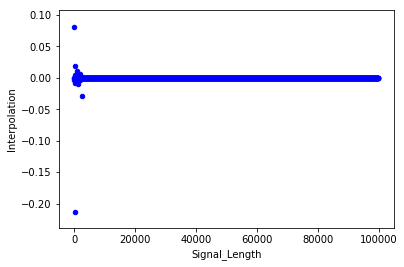

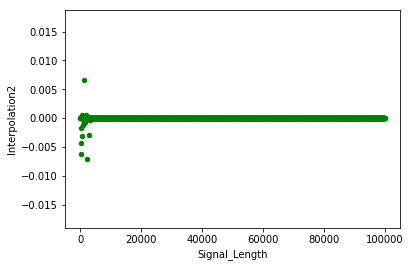

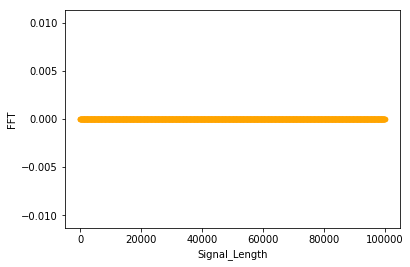

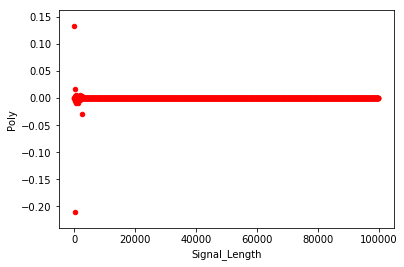

In [15]:
diffs.plot.scatter(x='Signal_Length', y='Interpolation', c="blue")
diffs.plot.scatter(x='Signal_Length', y='Interpolation2', c="green")
diffs.plot.scatter(x='Signal_Length', y='FFT', c="orange")
diffs.plot.scatter(x='Signal_Length', y='Poly', c="red")